In [1]:
!pip install py-heat-magic
%load_ext heat

In [2]:
'''%%heat
from lib import *
import numpy as np
import os
# get all the folders in the dataset except the ones that start with a dot
folders_list = sorted([folder for folder in os.listdir('resized') if not folder.startswith('.')])
# assign a period to each folder
periods = {1300+idx*25: folder for idx, folder in enumerate(folders_list)}
print(periods)

from sklearn.model_selection import train_test_split
for period, folder in periods.items():
    dataset = get_images(period, folder)
    x_train, y_train, x_test, y_test = train_test_split(dataset[:, 0], dataset[:, 1], test_size=0.2)
    # store x_train under the directory of train
    np.save(f'train/paths/{period}', x_train, allow_pickle=True)
    # store x_train under the directory of test
    np.save(f'test/paths/{period}', x_test, allow_pickle=True)

periods = [1300 + index * 25 for index in range(11)]
for period in periods:
    image_paths = np.load(f'train/paths/{period}.npy', allow_pickle=True)
    print(f'Loading images for period {period}...')
    binary_images = np.array(list(map(load_image_binarize, image_paths)), dtype=object)
    print(f'Computing features for period {period}...')
    features_of_period = np.array(list(map(get_psd, binary_images)), dtype=object)
    break
    np.save(f'train/features/{period}', features_of_period, allow_pickle=True)'''


{1300: '1300', 1325: '1325', 1350: '1350', 1375: '1375', 1400: '1400', 1425: '1425', 1450: '1450', 1475: '1475', 1500: '1500', 1525: '1525', 1550: '1550'}
Loading images for period 1300...


/Users/wasabi/capstone/lib.py:270: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = color.rgb2gray(image)


Computing features for period 1300...
image
Time taken by function: 0.21883702278137207
image
Time taken by function: 5.303681135177612
image
Time taken by function: 2.778115749359131
image
Time taken by function: 0.9168848991394043
image
Time taken by function: 4.7795209884643555
image
Time taken by function: 0.8555071353912354
image
Time taken by function: 0.7194409370422363
image
Time taken by function: 0.7835118770599365
image
Time taken by function: 1.0934557914733887
image
Time taken by function: 1.9696152210235596
image
Time taken by function: 3.394556999206543
image
Time taken by function: 0.04070401191711426
image
Time taken by function: 1.223832130432129
image
Time taken by function: 1.123396873474121
image
Time taken by function: 3.052773952484131
image
Time taken by function: 2.4118099212646484
image
Time taken by function: 1.6572363376617432
image
Time taken by function: 0.05659604072570801
image
Time taken by function: 3.5288608074188232
image
Time taken by function: 1.06

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import (threshold_otsu, threshold_niblack, threshold_sauvola)
from skimage.util import invert
from skimage.morphology import skeletonize
import numpy as np
import scipy.ndimage as ndi
from skimage import measure
from skimage import img_as_ubyte
import concurrent.futures
import os
import cv2
e = 7
min_frag_size = 2*e+2
import time

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def checkboundary(x, y, w, h):
    return x >= 0 and x < w and y >= 0 and y < h
def experiment(skeleton):
    h, w = skeleton.shape
    used = np.full(h * w, False)
    fragments = []

    for y in range(h):
        for x in range(w):
            if skeleton[y, x] and not used[y * w + x]:
                tmplist = []
                stack = [np.array([y, x])]

                while stack:
                    cy, cx = stack.pop()

                    if used[cy * w + cx]:
                        continue

                    used[cy * w + cx] = True
                    tmplist.append(np.array([cy, cx]))

                    nCnt = 0
                    for sy in range(-1, 2):
                        for sx in range(-1, 2):
                            if checkboundary(cx + sx, cy + sy, w, h) and skeleton[cy + sy][cx + sx]:
                                nCnt += 1
                                stack.append(np.array([cy + sy, cx + sx]))

                    if nCnt == 2 or nCnt > 3:
                        fragments.append(tmplist)
                        break
    return fragments


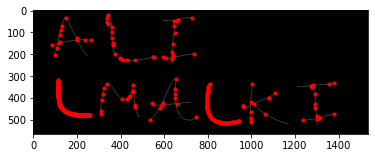

In [6]:
from lib import *
import matplotlib.pyplot as plt

image_path = 'dev_images/ali_lmalki.jpeg'
image = load_image_binarize(image_path)
skeleton = skeletonize(invert(image))
opencv_skeleton = skimage_to_opencv(skeleton)
fragments = extract_fragments(opencv_skeleton, opencv_connected_components(opencv_skeleton))
minima = extract_angles_minima(skeleton, fragments, e)

fig, ax = plt.subplots()
ax.imshow(skeleton, cmap='gray')

# Plot markers at locations of minima
for idx in minima:
    y, x = idx  # Switch to (x, y) coordinates for plotting
    ax.scatter(x, y, c='r', s=10)

plt.show()
